# Rocket Sience 

Astronomy is considered one of the most difficult fields of study, hence the phrase 'it's not rocket science'... However, space is a very interesting field, even for children. Therefore, in this assignment, let's make the most difficult aspects of astronomy as accessible as possible for children!

For this assignment, you will need to create four functions that relate to space education for children. The functions are as follows:

- explain(text) This function gathers information from https://spaceplace.nasa.gov/glossary/en/ and prints a kidsproof definition for the given term. Print out ''No definition found!' if nothing was found.
- related(text) This function will print 5 related words to a specific term from https://relatedwords.io. Print out ''No related terms!' if nothing was found.
- coloring(text) This function will download the first coloring page from https://www.ultracoloringpages.com that relates to the given term. Print out 'Failed to download image!' if nothing was found.
- book(text) This function will search for the first children's book that has the specific term in its title or description from the list of space books for kids. Print out ''No related terms!' if nothing was found. provided at https://childhood101.com/space-books-for-kids/ and prints its information. Print out ''No book found!' if nothing was found.

Think very carefully about extra functions, is it necessary to scrape each page every time, or can you scrape certain pages once and store that information in a dictionary or a list? That's why you should provide at least one extra function, but hopefully, you'll create more! This is an exercise in how to make your code better, more structured, but especially less aggressive because don't forget that web scraping is in a gray area.

Write this all in a script "space.py" that calls the main() function from an if __name__ == "__main__": block!

Please note that only BeautifulSoup and Requests are the allowable external packages for this assignment, which are already accessible in Codegrade.


# Code 
## Imports

In [2]:
from bs4 import BeautifulSoup
import requests

## Functions

<!DOCTYPE html>

<html lang="en">
<head>
<title>Moon Words - 400+ Words Related to Moon</title>
<meta content="A big list of 'moon' words. We've compiled all the words related to moon and organised them in terms of their relevance and association with moon." name="description"/>
<link href="https://cdn.glitch.com/4495d6dc-a617-4be7-8b59-ed86620f3107%2Fbook.png?1534138442062" id="favicon" rel="icon" type="image/x-icon"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<link href="https://fonts.googleapis.com/css?family=Open+Sans" rel="stylesheet"/>
<link href="https://cdnjs.cloudflare.com/ajax/libs/normalize/8.0.0/normalize.min.css" rel="stylesheet"/>
</head>
<body>
<style>
      
      body * {
        font-family: 'Open Sans', sans-serif;
      }
      
      html, body {
        background: #eee;
        margin: 0;
        padding: 0;
        color: #222;
      }
   
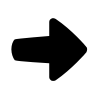

AttributeError: 'NoneType' object has no attribute 'find_all'

In [24]:
def explain(text):
    url = "https://spaceplace.nasa.gov/glossary/en/"
    resp = requests.get(url)
    html = resp.text
    soup = BeautifulSoup(html)

    contentDiv = soup.find("div",{"class","content"})
    spaceTerms = contentDiv.findAll("p")
    
    for s in spaceTerms:
        splited = s.text.split(":")
        if text == splited[0].lower():
            return splited[1]

    return "No defenition found!"

def related(text):
    url = "https://relatedwords.io/" + text
    resp = requests.get(url)

    html = resp.text 
    soup = BeautifulSoup(html)

    print(soup)

    list = soup.find("ul",{"id","terms-list"})
    print(list)

    all = list.find_all("li")

    for l in all:
        print(l.text)

related("moon")

## Main

In [13]:
def main():
    term = input("Enter a space related term: ")
    print(explain(term))

if __name__ == "__main__":
    main()


 A natural object that travels around a bigger natural object. Planets can have moons. Dwarf planets can have moons. Even some asteroids have moons! Astronomers usually call them satellites or natural satellites.
